A Project is based upon the hate speech detection in online platform using machine learning models

Data **Collection**

In [ ]:
pip install pandas nltk


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Replace with the path to your file in Google Drive
file_path = '/content/HateSpeechDataset.csv'

df = pd.read_csv(file_path)
df.head()

,Content,Label,Content_int
0,denial of normal the con be asked to comment o...,1.0,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
1,just by being able to tweet this insufferable ...,1.0,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22..."
2,that is retarded you too cute to be single tha...,1.0,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,..."
3,thought of a real badass mongol style declarat...,1.0,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,..."
4,afro american basho,1.0,"[146715, 46, 47, 48, 146714]"


In [ ]:
df.describe()

,Label
count,21958.000000
mean,0.260816
std,0.439090
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df.tail()

,Content,Label,Content_int
21954,this food is so awful i want to cry,0.0,"[146715, 19, 2297, 29, 97, 879, 80, 110, 7, 58..."
21955,this food is so awful i want to die,0.0,"[146715, 19, 2297, 29, 97, 879, 80, 110, 7, 10..."
21956,this house is so awful i want to die,0.0,"[146715, 19, 450, 29, 97, 879, 80, 110, 7, 103..."
21957,i hate misogyny its disgusting,0.0,"[146715, 80, 133, 17486, 437, 756, 146714]"
21958,this coffee is so awful i want to,NaN,NaN


In [ ]:
!pip install nltk beautifulsoup4


Task 1: Data Cleaning is a process which makes a dataset into proper cleaned text by removing all unwanted charecters from text

Data Cleaning

In [ ]:
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data files (only the first time)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join words back into a single string
    clean_text = ' '.join(words)

    return clean_text

# Assuming your text data is in a column named 'text'
# Apply the cleaning function to the 'text' column and create a new 'cleanText' column
df['cleanText'] = df['Content'].apply(clean_text) # Change 'Content' to the actual column name containing text data

# Display the first few rows of the cleaned dataframe
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Content,Label,Content_int,cleanText
0,denial of normal the con be asked to comment o...,1.0,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...
1,just by being able to tweet this insufferable ...,1.0,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...
2,that is retarded you too cute to be single tha...,1.0,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life
3,thought of a real badass mongol style declarat...,1.0,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...
4,afro american basho,1.0,"[146715, 46, 47, 48, 146714]",afro american basho


In [ ]:
import re

# Example of a function to clean text data
def clean_text(Content):
    Content = Content.lower()  # Convert to lowercase
    Content = re.sub(r'\d+', '', Content)  # Remove numbers
    Content = re.sub(r'\s+', ' ', Content)  # Remove extra spaces
    Content = re.sub(r'[^\w\s]', '', Content)  # Remove punctuation
    return Content

# Apply the cleaning function to the 'Content' column
df['Content'] = df['Content'].apply(clean_text)

# Remove duplicates
df.drop_duplicates(subset='Content', inplace=True)

# Drop rows with missing values in 'Content' or 'Label' columns
df.dropna(subset=['Content', 'Label'], inplace=True)

# Display the first few rows of the cleaned dataset
print(df.head())


                                             Content  Label  \
0  denial of normal the con be asked to comment o...    1.0   
1  just by being able to tweet this insufferable ...    1.0   
2  that is retarded you too cute to be single tha...    1.0   
3  thought of a real badass mongol style declarat...    1.0   
4                                afro american basho    1.0   

                                         Content_int  \
0  [146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...   
1  [146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...   
2  [146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...   
3  [146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...   
4                       [146715, 46, 47, 48, 146714]   

                                           cleanText  
0  denial normal con asked comment tragedy emotio...  
1  able tweet insufferable bullshit prof trump na...  
2                          retarded cute single life  
3  thought real badass mongol style declaration w...  
4        

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


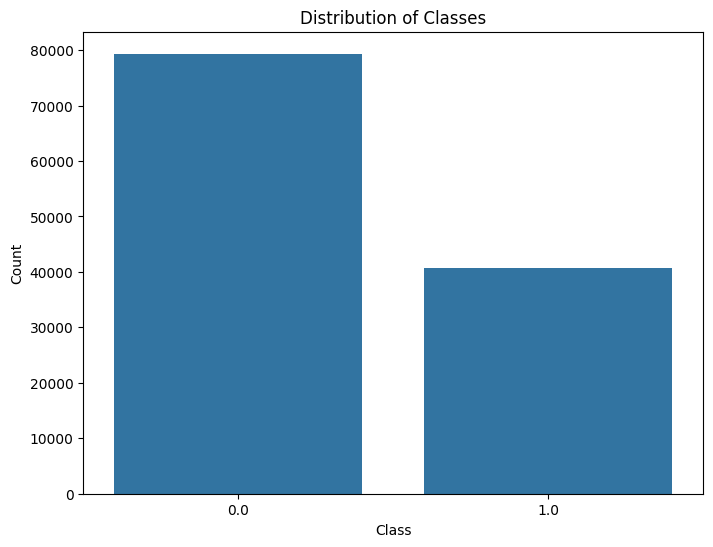

In [ ]:
# Install required libraries
!pip install matplotlib seaborn wordcloud

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
import nltk

nltk.download('punkt')

# Load the dataset
df = pd.read_csv('/content/HateSpeechDataset.csv')

# Distribution of Classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here we got cleaned dataset which only consist of keywords in the the dataset. Which makes a model to predict the hate speech.

In [ ]:
import pandas as pd

# Replace with the path to your file in Google Drive
file_path = '/content/drive/MyDrive/cleaned_dataset.csv'

df = pd.read_csv(file_path)
df.head()


<ipython-input-24-dd03938475f7>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Content,Label,Content_int,cleaned_text
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...
4,afro american basho,1,"[146715, 46, 47, 48, 146714]",afro american basho


**Data Encoding Methods**

In [ ]:
import pandas as pd



# Just to display front data from the dataset
df.head(10)


,Content,Label,Content_int,cleaned_text
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...
4,afro american basho,1,"[146715, 46, 47, 48, 146714]",afro american basho
5,yeah retard haha,1,"[146715, 49, 13, 50, 146714]",yeah retard haha
6,the ching chong chung stuff,1,"[146715, 3, 51, 52, 53, 54, 146714]",ching chong chung stuff
7,the dead what a slut still warm when she tweet...,1,"[146715, 3, 55, 56, 24, 57, 58, 59, 60, 61, 62...",dead slut still warm tweeted slut vagina mate ...
8,let your tweets be harmless it will not affect...,1,"[146715, 71, 72, 73, 5, 74, 63, 75, 76, 77, 78...",let tweet harmless affect way faggot one n
9,these latinos who have a problem with immigrat...,1,"[146715, 85, 86, 67, 87, 24, 88, 89, 90, 91, 9...",latino problem immigration enforcement stay sh...


In [ ]:
df.describe()

,Content,Label,Content_int,cleaned_text
count,440906,440906,440906,440563
unique,417561,5,417561,407715
top,content,0,"[146715, 7139, 146714]",bitch
freq,7,207120,7,56


Task 2 **Data** **Tokenization**

Data Tokenoization is a technique in machine learning to split a sentence into words and charecters

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Define a function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

# Apply the function to the text column
df['tokenized_text'] = df['Content'].apply(tokenize_text)

# Display the first few rows with tokenized text
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Content,Label,Content_int,cleaned_text,tokenized_text
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...,"[denial, of, normal, the, con, be, asked, to, ..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...,"[just, by, being, able, to, tweet, this, insuf..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life,"[that, is, retarded, you, too, cute, to, be, s..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...,"[thought, of, a, real, badass, mongol, style, ..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]",afro american basho,"[afro, american, basho]"


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd

# Replace with the path to your file in Google Drive
file_path = '/content/drive/MyDrive/cleaned_dataset.csv'

df = pd.read_csv(file_path)
df.head()

<ipython-input-32-dd03938475f7>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Content,Label,Content_int,cleaned_text
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...
4,afro american basho,1,"[146715, 46, 47, 48, 146714]",afro american basho


Dataset splitting into traning and testing

In [ ]:
df1 = df.sample(1000)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 177907 to 201279
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Content       1000 non-null   object
 1   Label         1000 non-null   object
 2   Content_int   1000 non-null   object
 3   cleaned_text  1000 non-null   object
dtypes: object(4)
memory usage: 39.1+ KB


In [ ]:

import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Define a function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

# Apply the function to the text column
df['tokenized_text'] = df['Content'].apply(tokenize_text)

# Display the first few rows with tokenized text
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Content,Label,Content_int,cleaned_text,tokenized_text
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...,"[denial, of, normal, the, con, be, asked, to, ..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...,"[just, by, being, able, to, tweet, this, insuf..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life,"[that, is, retarded, you, too, cute, to, be, s..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...,"[thought, of, a, real, badass, mongol, style, ..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]",afro american basho,"[afro, american, basho]"


In [ ]:
import pandas as pd

# Replace with the path to your file in Google Drive
file_path = '/content/tokenized_text.csv'

df = pd.read_csv(file_path)
df.head()

,Content,Label,Content_int,tokenized_text
0,denial of normal the con be asked to comment o...,1.0,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...","['denial', 'of', 'normal', 'the', 'con', 'be',..."
1,just by being able to tweet this insufferable ...,1.0,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...","['just', 'by', 'being', 'able', 'to', 'tweet',..."
2,that is retarded you too cute to be single tha...,1.0,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...","['that', 'is', 'retarded', 'you', 'too', 'cute..."
3,thought of a real badass mongol style declarat...,1.0,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...","['thought', 'of', 'a', 'real', 'badass', 'mong..."
4,afro american basho,1.0,"[146715, 46, 47, 48, 146714]","['afro', 'american', 'basho']"


In [ ]:
df1 = df.sample(1000)

Dataset word to vec

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np


word2vec_model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

def average_word_vectors(tokens, model, num_features):
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in model.wv:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

df['word2vec'] = df['tokenized_text'].apply(lambda tokens: average_word_vectors(tokens, word2vec_model, 100))

print("Word2Vec Embeddings:\n", df[['Content', 'word2vec']])

Word2Vec Embeddings:
                                                   Content  \
0       denial of normal the con be asked to comment o...   
1       just by being able to tweet this insufferable ...   
2       that is retarded you too cute to be single tha...   
3       thought of a real badass mongol style declarat...   
4                                     afro american basho   
...                                                   ...   
440901  crash another movie from left field i have to ...   
440902  i why do not you debate first before starting ...   
440903  removal of i reverted the removal of the above...   
440904  i have unblocked you eddie as i discussed on u...   
440905  you have the ability to delete that revision a...   

                                                 word2vec  
0       [-0.051961564, -0.060625378, 0.14459263, 1.003...  
1       [-0.8576489, -0.05298517, 0.0398528, 0.9560657...  
2       [0.047096074, -0.7424701, 0.64681906, 1.404704...  
3    

In [ ]:
print(df['word2vec'].iloc[1])

[-0.8576489  -0.05298517  0.0398528   0.9560657   0.6695166  -0.49822357
 -0.8470678  -0.573609   -0.708845    1.3215375  -0.30340928  0.22174118
  1.0864632   1.4986707  -0.10874281  0.33649337  1.2994554   1.1537435
 -1.0303787   0.68703514 -0.9247732  -0.7645311   0.22281812  0.15486039
  0.3211526   0.520726    0.67329085  0.13981104  0.21292667  0.4099431
  0.08408808 -0.8028553  -0.42515013  0.30560067 -0.4204252  -0.4625735
  0.4268662   0.75937164  0.19264959  1.2049068   0.57408905  1.4565208
 -0.3383059  -0.77252185 -0.71830535 -0.04566758  0.0223447  -0.37484628
  0.10467949 -0.53290117  0.24223518 -0.12954167 -0.5779947  -0.58403563
  0.19506504 -0.76513386 -0.24542299 -0.7146927  -0.42114404  0.33917263
 -0.73250425  0.1452567   0.39140198  0.05912368  0.11399242 -0.50776196
  1.4995484  -0.07552827  0.25928652  1.0283631  -0.01832583 -0.41099805
  0.3059617  -0.4510847   0.48881534 -0.7776661  -0.94639194 -0.55162406
  0.35745466 -0.47095808  0.04535875  0.79461735 -0.286

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440906 entries, 0 to 440905
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Content         440906 non-null  object
 1   Label           440906 non-null  object
 2   Content_int     440906 non-null  object
 3   cleaned_text    440563 non-null  object
 4   tokenized_text  440906 non-null  object
 5   word2vec        440906 non-null  object
dtypes: object(6)
memory usage: 20.2+ MB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 152112 to 140608
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Content         1000 non-null   object
 1   Label           1000 non-null   object
 2   Content_int     1000 non-null   object
 3   cleaned_text    998 non-null    object
 4   tokenized_text  1000 non-null   object
 5   word2vec        1000 non-null   object
dtypes: object(6)
memory usage: 54.7+ KB


In [ ]:
df['tokenized_text'].head()

0    [denial, of, normal, the, con, be, asked, to, ...
1    [just, by, being, able, to, tweet, this, insuf...
2    [that, is, retarded, you, too, cute, to, be, s...
3    [thought, of, a, real, badass, mongol, style, ...
4                              [afro, american, basho]
Name: tokenized_text, dtype: object

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 60073 to 111030
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Content         1000 non-null   object 
 1   Label           1000 non-null   float64
 2   Content_int     1000 non-null   object 
 3   tokenized_text  1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 39.1+ KB


In [ ]:
# Convert the 'Label' column to a consistent data type (e.g., string)
df['Label'] = df['Label'].astype(str)

# Features and labels
X = df['Content']
y = df['Label']

# Check for classes with only one instance
from collections import Counter
label_counts = Counter(y)
rare_classes = [label for label, count in label_counts.items() if count == 1]

# Option 1: Remove instances of rare classes
for rare_class in rare_classes:
    df = df[df['Label'] != rare_class]

# Option 2: Oversample rare classes (requires imbalanced-learn library)
# !pip install imbalanced-learn
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)
# X = pd.Series(X_resampled.flatten())
# y = pd.Series(y_resampled)

# Recalculate features and labels after handling rare classes
X = df['Content']
y = df['Label']

# Training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorizing using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

# applied to balance a data  which makes model to predict actual score
smote = SMOTE(random_state=42) # Smote is statistical technique to balnce a dataset
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# A Classification Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Evaluating the  model
print("Logistic Regression Model")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model
[[16753  5373]
 [ 3292  6923]]
              precision    recall  f1-score   support

         0.0       0.84      0.76      0.79     22126
         1.0       0.56      0.68      0.62     10215

    accuracy                           0.73     32341
   macro avg       0.70      0.72      0.70     32341
weighted avg       0.75      0.73      0.74     32341



In [ ]:
# Define the 'train_and_evaluate' function if it's not defined elsewhere
def train_and_evaluate(X_train, X_test, y_train, y_test, vectorizer_name):
    # Add your model training and evaluation logic here.
    # For example:
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report, confusion_matrix

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"Results using {vectorizer_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Now you can call the function
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
train_and_evaluate(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results using TF-IDF:
[[20101  2025]
 [ 5989  4226]]
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83     22126
         1.0       0.68      0.41      0.51     10215

    accuracy                           0.75     32341
   macro avg       0.72      0.66      0.67     32341
weighted avg       0.74      0.75      0.73     32341



**Deep** **learning**
We are building Convolutional Neural Network(CNN) Model based on deep learning

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('/content/drive/MyDrive/cleaned_dataset.csv')

# Ensure the column names are correct
print(df.columns)

# Text and labels
texts = df['Content'].values
labels = df['Label'].values

# If labels are strings, convert them to integers
# Assuming the labels are 'spam' and 'not spam', you can map them to integers
label_mapping = {'spam': 0, 'not spam': 1}
labels = df['Label'].map(label_mapping).values

# Tokenize text
tokenizer = Tokenizer(num_words=5000, lower=True, oov_token='UNK')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=100)

# Convert labels to float
labels = labels.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, input_length=100))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {accuracy:.2f}')


<ipython-input-1-dc5438e1dbbc>:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/cleaned_dataset.csv')


Index(['Content', 'Label', 'Content_int', 'cleaned_text'], dtype='object')
Epoch 1/5
5512/5512 - 2299s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - 2299s/epoch - 417ms/step
Epoch 2/5
5512/5512 - 2232s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - 2232s/epoch - 405ms/step
Epoch 3/5
5512/5512 - 2222s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - 2222s/epoch - 403ms/step
Epoch 4/5
5512/5512 - 2210s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - 2210s/epoch - 401ms/step
Epoch 5/5
5512/5512 - 2213s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00 - 2213s/epoch - 401ms/step
2756/2756 - 26s - loss: nan - accuracy: 0.0000e+00 - 26s/epoch - 9ms/step
Test Accuracy: 0.00


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification

# Load data
df = pd.read_csv('/content/drive/MyDrive/cleaned_dataset.csv')
texts = df['Content'].values
labels = df['Label'].values

# Encode labels (assuming binary classification, e.g., 'spam' and 'not spam')
label_mapping = {'hate': 0, 'not hate': 1}
labels = df['Label'].map(label_mapping).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences in the training set
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

# Convert the data to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(32)

# Load BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
model.fit(train_dataset, epochs=3, validation_data=test_dataset)

# Evaluate model
loss, accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {accuracy:.2f}')


<ipython-input-2-b9778fcc7af8>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/cleaned_dataset.csv')
